In [7]:
# Diabetes Prediction Model Trainer (with 5 models + scaler)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


In [8]:

# Load dataset
df = pd.read_csv("Datasets/diabetes_data.csv")


In [9]:


# Split features and target
X = df.drop(columns=["Outcome"])
y = df["Outcome"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [10]:


# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier()
}


# Train, predict and evaluate
best_model = None
best_model_name = ""
best_accuracy = 0

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.4f}")
    
    if acc > best_accuracy:
        best_accuracy = acc
        best_model = model
        best_model_name = name
        


Logistic Regression Accuracy: 0.7532
Decision Tree Accuracy: 0.7338
Random Forest Accuracy: 0.7403
SVM Accuracy: 0.7338
KNN Accuracy: 0.6948


In [14]:

# Save best model and scaler
with open("models/best_diabetes_model.sav", "wb") as f:
    pickle.dump((scaler, best_model), f)
    

print(f"\n✅ Best Model: {best_model_name} with accuracy {best_accuracy:.4f}")
print("📦 Saved to: models/best_diabetes_model.sav")



✅ Best Model: Logistic Regression with accuracy 0.7532
📦 Saved to: models/best_diabetes_model.sav


C:\Users\vidhi\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


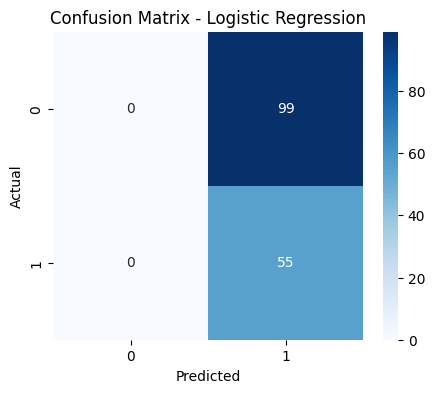

In [12]:
##  Confusion Matrix for Best Model
y_pred_best = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix - {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [13]:
# Prediction Example
input_data = (2, 120, 70, 20, 80, 25.0, 0.5, 30)  
input_data_as_numpy_array = np.asarray(input_data).reshape(1, -1)
prediction = best_model.predict(input_data_as_numpy_array)
print("Prediction Result:", "Diabetes Detected" if prediction[0] == "1" else "No Diabetes")

Prediction Result: No Diabetes
